Prendiamo un qubit in uno stato |s>, e gli altri due in |0>, poi entagla i tre qubit. Poi mettiamo il drago che fa una trasformazione unitaria su uno dei tre qubit e si ottiene faccendo qc.unitary che riceve una matrice che riceve theta. Poi qui attacchiamo il circuito che dovrá usare 2 ancille. Misuro tutto. Se le ancille sono in 00 dovrebbe venire cos theta ^2

In [113]:
# import libraries
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler as Sampler
import matplotlib.pyplot as plt
import numpy as np

In [130]:
def circuitTheta(theta):
    qc = QuantumCircuit(5)
    
    # Initialization
    
    qc.barrier()
    
    # Entanglement block
    
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    
    qc.barrier()
    
    # Apply unitary (Dragon error)
    
    matrix = [
        [np.cos(theta), 1j * np.sin(theta)],
        [1j * np.sin(theta), np.cos(theta)],
    ]
    
    qc.unitary(matrix, 0)
    
    qc.barrier()
    
    # Beaver section
    
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(1, 4)
    qc.cx(2, 4)
    
    qc.barrier()
    
    # Measurement
    
    qc.measure_all()
    
    result = Sampler().run([qc], shots=1000).result()[0]
    
    # co is a dictionary
    co = result.data.meas.get_counts()
    
    # result is a list of the keys of the dictionary
    result = list(co.keys())
    
    #
    p0 = 0
    p1 = 0
    for i in range(len(result)):
        ancilla = result[i][:2]
        count = co[result[i]]
        
        if ancilla == '00':
            p0 += count
        else:
            p1 += count

    
    return p0 / (p0 + p1)

In [131]:
stepCount = 100
results = []
y = []
for theta in np.linspace(0, np.pi, stepCount):
    response = circuitTheta(theta)
    y.append(np.cos(theta)**2)
    results.append(response)

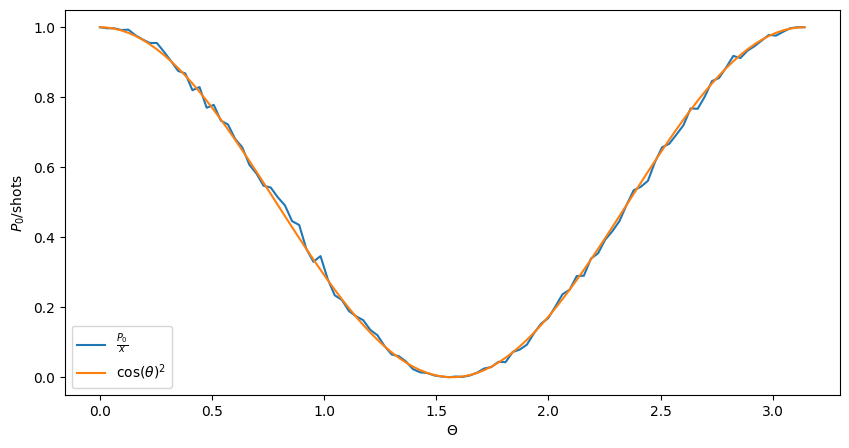

In [132]:
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, np.pi, stepCount), results)
plt.plot(np.linspace(0, np.pi, stepCount), y)
plt.legend([r'$\frac{P_0}{x}$', r'$\cos(\theta)^2$'])
plt.xlabel(r'$\Theta$')
plt.ylabel(r'$P_0 / \text{shots}$')
plt.show()
